In [1]:
# Tarea N°6 - Parte 1 - Clase Celda
# Khevin Flores Olivares

class Celda:
    def __init__(self, estado=False):
        """
        Inicializa la celda.
        estado: True (viva) o False (muerta)
        """
        self.estado = estado

    def interactuar(self, vecinos):
        """
        Actualiza el estado de la celda según el juego de Conway.
        vecinos: lista de celdas vecinas (instancias de Celda)
        """
        vivas = sum(1 for v in vecinos if v.estado)
        if self.estado:
            return vivas == 2 or vivas == 3
        else:
            return vivas == 3

# ------------------------------
# Prueba rápida de Celda
# ------------------------------
c = Celda(False)
vecinas = [Celda(True), Celda(True), Celda(True)]
nuevo_estado = c.interactuar(vecinas)
print(f"Estado antes: {c.estado}, Estado después de interactuar: {nuevo_estado}")
# Debe imprimir: Estado antes: False, Estado después de interactuar: True


Estado antes: False, Estado después de interactuar: True


In [2]:
# Parte 2 - Clase Grilla


import matplotlib.pyplot as plt
import numpy as np

class Grilla:
    def __init__(self, N, posiciones_vivas=[], nombre_archivo="grilla", contador=0):
        """
        Inicializa la grilla N x N con celdas vivas según posiciones_vivas.
        """
        self.N = N
        self.nombre_archivo = nombre_archivo
        self.contador = contador
        self.celdas = [[Celda(False) for _ in range(N)] for _ in range(N)]
        self.celdas_siguiente = [[Celda(False) for _ in range(N)] for _ in range(N)]
        
        for (i, j) in posiciones_vivas:
            self.celdas[i][j].estado = True
            self.celdas_siguiente[i][j].estado = True

    def actualizar_celdas(self):
        """
        Copia el estado de celdas_siguiente a celdas (sin copiar objetos).
        """
        for i in range(self.N):
            for j in range(self.N):
                self.celdas[i][j].estado = self.celdas_siguiente[i][j].estado

    def _vecinos(self, i, j):
        """
        Devuelve una lista con las celdas vecinas de la celda (i,j)
        """
        vecinos = []
        for x in range(max(0, i-1), min(self.N, i+2)):
            for y in range(max(0, j-1), min(self.N, j+2)):
                if x == i and y == j:
                    continue
                vecinos.append(self.celdas[x][y])
        return vecinos

    def avanzar(self):
        """
        Calcula la siguiente generación de la grilla.
        """
        for i in range(self.N):
            for j in range(self.N):
                vecinos = self._vecinos(i, j)
                self.celdas_siguiente[i][j].estado = self.celdas[i][j].interactuar(vecinos)
        self.actualizar_celdas()

    def visualizar(self):
        """
        Muestra la grilla como imagen usando matplotlib.
        """
        array = np.array([[1 if c.estado else 0 for c in fila] for fila in self.celdas])
        plt.imshow(array, cmap='Greys', interpolation='none')
        plt.title(f"Generación {self.contador}")
        plt.show()
        self.contador += 1

# ------------------------------
# Prueba rápida de Grilla 5x5
# ------------------------------
g = Grilla(5, posiciones_vivas=[(1,2),(2,2),(3,2)])
print("Antes de avanzar:")
for fila in g.celdas:
    print([c.estado for c in fila])

g.avanzar()
print("\nDespués de avanzar:")
for fila in g.celdas:
    print([c.estado for c in fila])


Antes de avanzar:
[False, False, False, False, False]
[False, False, True, False, False]
[False, False, True, False, False]
[False, False, True, False, False]
[False, False, False, False, False]

Después de avanzar:
[False, False, False, False, False]
[False, False, False, False, False]
[False, True, True, True, False]
[False, False, False, False, False]
[False, False, False, False, False]


Estado inicial:


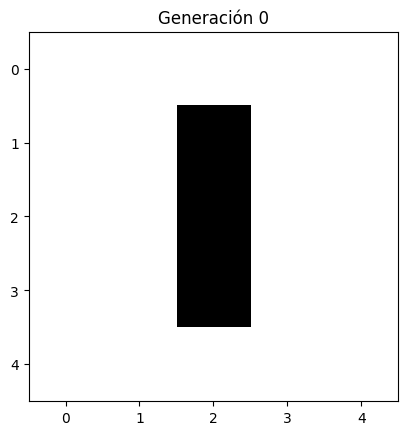

Generación 1:


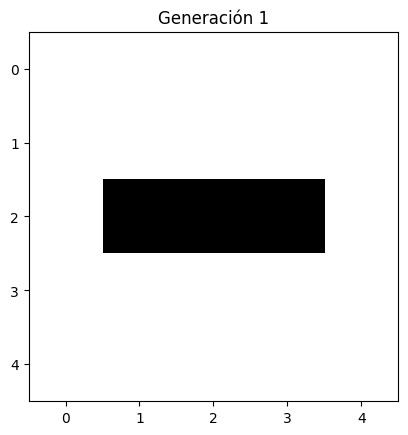

Generación 2:


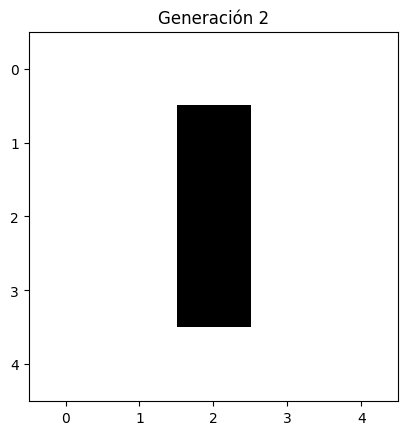

Generación 3:


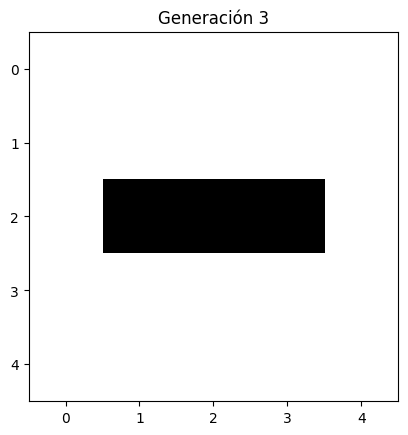

Generación 4:


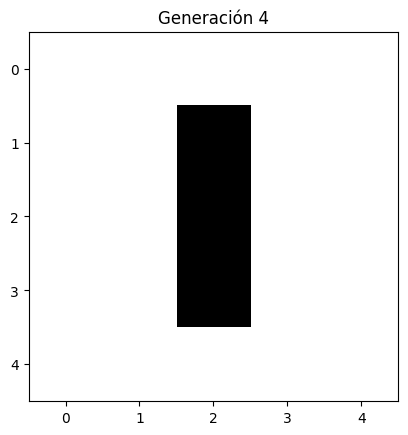

Generación 5:


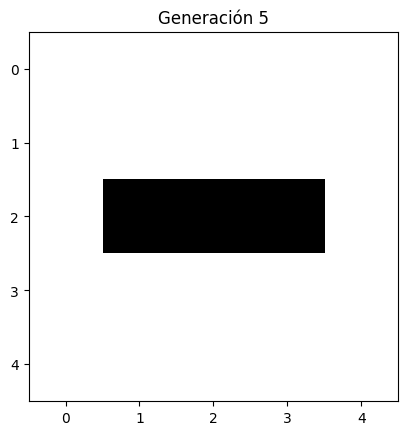

In [3]:
# Parte 3 - Visualización de evolución


# Crear una grilla 5x5 con patrón inicial
g = Grilla(5, posiciones_vivas=[(1,2),(2,2),(3,2)])

print("Estado inicial:")
g.visualizar()  # Muestra la generación 0

# Simular varias generaciones
num_generaciones = 5
for i in range(1, num_generaciones + 1):
    g.avanzar()
    print(f"Generación {i}:")
    g.visualizar()


Estado inicial:


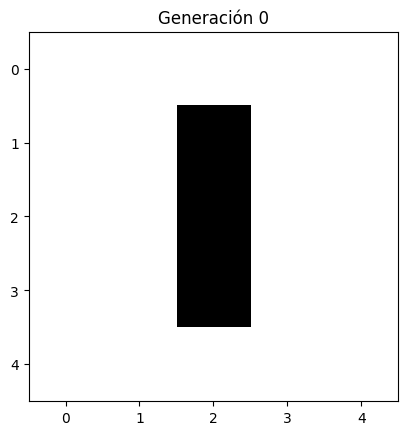

Generación 1:


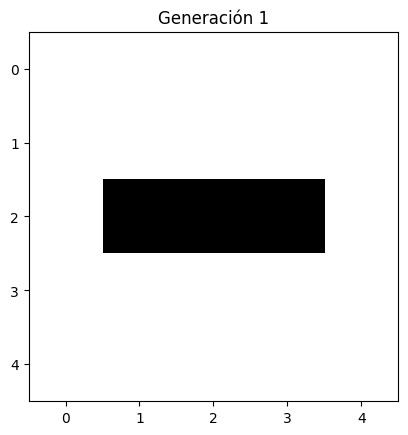

Generación 2:


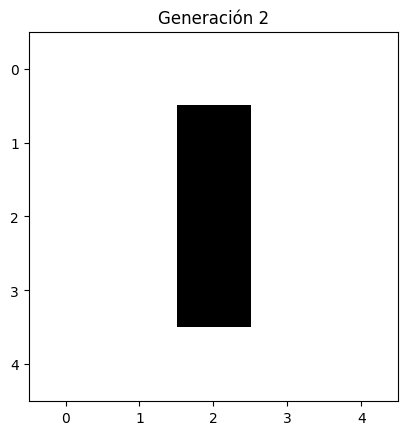

Generación 3:


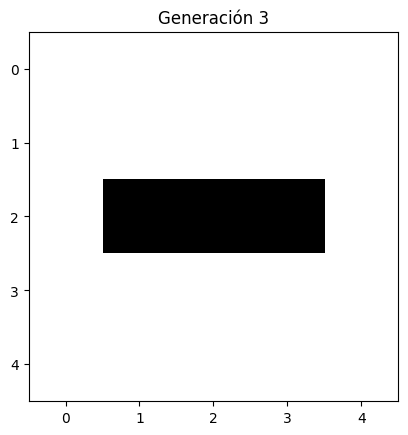

Generación 4:


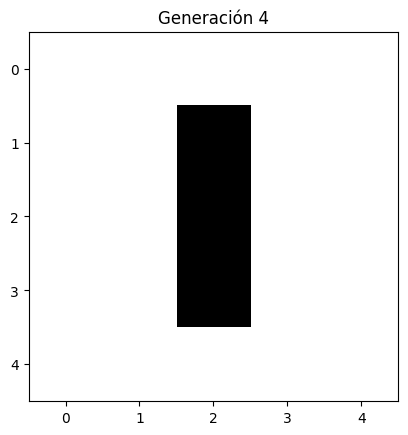

Generación 5:


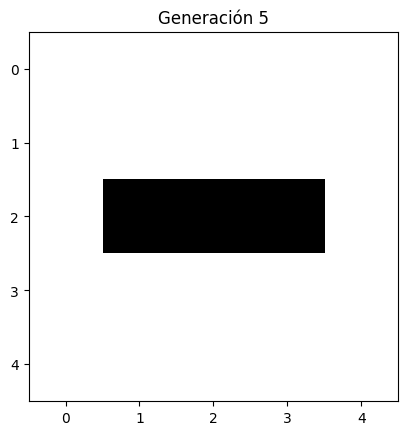

In [4]:
# Parte 4 - Simulación desde archivo

import sys

# Simular el argumento que recibiría el script desde la terminal
sys.argv = ['conway.py', 'datos.ini.txt']

# Leer el archivo
nombre_archivo = sys.argv[1]

with open(nombre_archivo, "r") as f:
    lineas = f.read().splitlines()

# Primera línea = tamaño de la grilla
N = int(lineas[0])

# Resto de líneas = posiciones de celdas vivas
posiciones_vivas = [tuple(map(int, linea.split(','))) for linea in lineas[1:]]

# Crear la grilla
g = Grilla(N, posiciones_vivas)

# Visualizar estado inicial
print("Estado inicial:")
g.visualizar()

# Simular varias generaciones
num_generaciones = 5
for i in range(1, num_generaciones + 1):
    g.avanzar()
    print(f"Generación {i}:")
    g.visualizar()
